# Forming Queries through the API!

Get familiar with the tools available for querying the database. The simplest way is to use the api classes [`snowexsql.api.PointMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L185) and  [`snowexsql.api.LayerMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L262). Each class has to very useful functions [`from_filter`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L192) and [`from_area`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L210)

## `from_filter`

<Axes: >

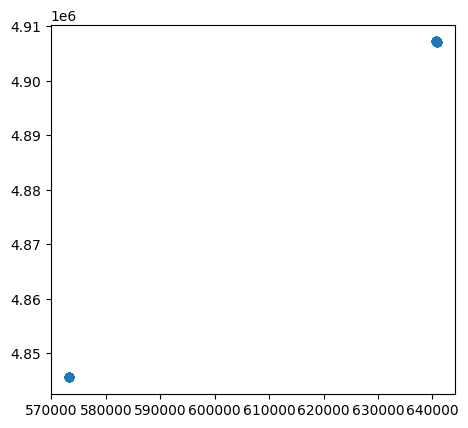

In [3]:
from snowexsql.api import LayerMeasurements, PointMeasurements
from datetime import datetime 

# Find some density pit measurements at the Boise site in december 2019.
df = LayerMeasurements.from_filter(
    type="density",
    site_name="Boise River Basin",
    date_less_equal=datetime(2020, 1, 1),
    date_greater_equal=datetime(2019, 12, 1),
)

df
df.plot()

## `from_area`

<Axes: >

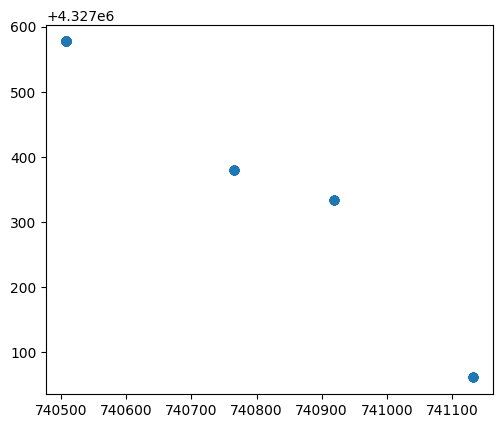

In [6]:
from snowexsql.api import LayerMeasurements
from datetime import datetime 
from shapely.geometry import Point 

# Find some SSA measurements within a distance of a known point
df = LayerMeasurements.from_area(pt=Point(740820.624625,4.327326e+06), crs=26912, buffer=500,
    type='specific_surface_area')

df
df.plot()

### How do I know what to filter on?
We got tools for that!

In [4]:
from snowexsql.api import PointMeasurements

measurements = PointMeasurements()
# Get the unique data names/types in the table
results = measurements.all_types
print('Available types = {}'.format(', '.join([str(r) for r in results])))

# Get the unique instrument in the table
results = measurements.all_instruments
print('\nAvailable Instruments = {}'.format(', '.join([str(r) for r in results])))

# Get the unique dates in the table
results = measurements.all_dates
print('\nAvailable Dates = {}'.format(', '.join([str(r) for r in results])))

# Get the unique site names in the table
results = measurements.all_site_names
print('\nAvailable sites = {}'.format(', '.join([str(r) for r in results])))

Available types = swe, depth, two_way_travel

Available Instruments = Mala 1600 MHz GPR, None, Mala 800 MHz GPR, pulse EKKO Pro multi-polarization 1 GHz GPR, pit ruler, mesa, magnaprobe, camera

Available Dates = 2020-05-28, 2020-01-09, 2020-05-23, 2020-01-04, 2019-11-29, 2019-10-20, 2019-11-30, 2020-04-17, 2020-02-19, 2020-02-26, 2020-02-03, 2020-05-05, 2019-10-05, 2019-12-29, 2020-06-02, 2019-10-28, 2020-01-30, 2020-05-22, 2020-03-09, 2019-12-09, 2019-12-28, 2020-02-24, 2020-03-17, 2020-04-01, 2020-05-14, 2019-10-29, 2019-10-14, 2019-10-02, 2020-01-31, 2020-04-18, 2020-04-29, 2020-04-26, 2019-10-12, 2020-02-23, 2020-01-22, 2020-01-01, 2019-11-21, 2020-05-10, 2020-02-12, 2020-05-06, 2019-11-19, 2019-10-25, 2019-11-02, 2020-02-08, 2020-04-14, 2020-04-02, 2019-11-16, 2020-04-07, 2019-12-27, 2019-10-01, 2020-04-16, 2020-06-08, 2019-12-13, 2019-10-17, 2019-10-22, 2020-04-21, 2020-01-03, 2019-12-12, 2019-12-08, 2020-01-25, 2020-02-29, 2019-11-24, 2019-10-18, 2020-05-09, 2020-03-22, 2019-11

Further we can gather the unique items in a query you are interested. 

In [23]:
print(LayerMeasurements.from_unique_entries(['date'], instrument='snowmicropen'))

[datetime.date(2020, 2, 4), datetime.date(2020, 2, 3), datetime.date(2020, 1, 30), datetime.date(2020, 2, 1), datetime.date(2020, 2, 6), datetime.date(2020, 1, 31), datetime.date(2020, 2, 12), datetime.date(2020, 2, 8), datetime.date(2020, 2, 5), datetime.date(2020, 1, 28), datetime.date(2020, 2, 11), datetime.date(2020, 2, 10), datetime.date(2020, 1, 29)]


## Query Nuances
### Limit size 
Try doing a large query. Something like

In [24]:
from snowexsql.api import PointMeasurements
# Ask the DB for a huge query.
df = PointMeasurements.from_filter(type='two_way_travel')
df
# Throws an exception, try adding the limit keyword arg in the function

Failed query for PointData


LargeQueryCheckException: Query will return 2296512 number of records, but we have a default max of 1000. If you want to proceed, set the 'limit' filter to the desired number of records.

What happened? We have put some guard rails on the db to allow you to explore without accidentall pull the entire snowex universe down. If you know you want a large query (defined as > 1000) then use the `limit = ####` option in the `from_filter` or `from_area` function.

**Note** - It is better to filter using other things besides the limit because the limit is not intelligent. It will simply limit the query by the order of entries that were submitted AND fit your filter. So if you encounter this then consider how to tighten up the filter.

### List of Criteria
You can use lists in your requests too!

In [25]:
from snowexsql.api import LayerMeasurements
ssa_instruments = ["IS3-SP-15-01US", "IRIS",  "IS3-SP-11-01F"]
LayerMeasurements.from_filter(instrument=ssa_instruments)

Failed query for PointData


LargeQueryCheckException: Query will return 8696 number of records, but we have a default max of 1000. If you want to proceed, set the 'limit' filter to the desired number of records.

### Greater than or Less than
Sometimes we want to isolate certain ranges of value or even dates. The `greater_equal` and `less_equal` terms can be added on to value or dates. 

In [26]:
from snowexsql.api import PointMeasurements

df = PointMeasurements.from_filter(value_greater_equal=100, type='depth', instrument='pulse EKKO Pro multi-polarization 1 GHz GPR', limit=100)
df

,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.962029,None,12,POINT (743146.962 4324344.879),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320356,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
1,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.933029,None,12,POINT (743146.933 4324344.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320357,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
2,None,None,103.532801,39.034350,-108.190913,4.324344e+06,743146.462029,None,12,POINT (743146.462 4324343.986),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320378,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
3,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.454029,None,12,POINT (743146.454 4324343.945),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320379,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
4,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.447029,None,12,POINT (743146.447 4324343.904),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320380,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.897029,None,12,POINT (743146.897 4324339.877),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320471,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
96,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.915029,None,12,POINT (743146.915 4324339.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320472,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
97,None,None,108.404933,39.034313,-108.190909,4.324340e+06,743146.934029,None,12,POINT (743146.934 4324339.802),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320473,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
98,None,None,108.404933,39.034312,-108.190909,4.324340e+06,743146.953029,None,12,POINT (743146.953 4324339.764),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320474,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan


## Recap 
You just came in contact with the new API tools. We can use each API class to pull from specific tables and filter the data. 
**You should know:**
* How to build queries using `from_filter`, `from_area`, `from_unique_entries`
* Determine what values to filter on
* Manage the limit error
* Filtering on greater and less than 
If you don't feel comfortable with these, you are probably not alone, let's discuss it!